### Setup environment

In [1]:
!nvidia-smi

Mon Mar  6 12:57:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
#@title Get datasets
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="NpLdedOQy7uhVTtukK8P")
project = rf.workspace("datasetconversion").project("aml-hw1")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to AML-HW1-1 in yolov8:: 100%|██████████| 364/364 [00:00<00:00, 1882.79it/s]


### Custom Training


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True 

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/AML-HW1-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

/content


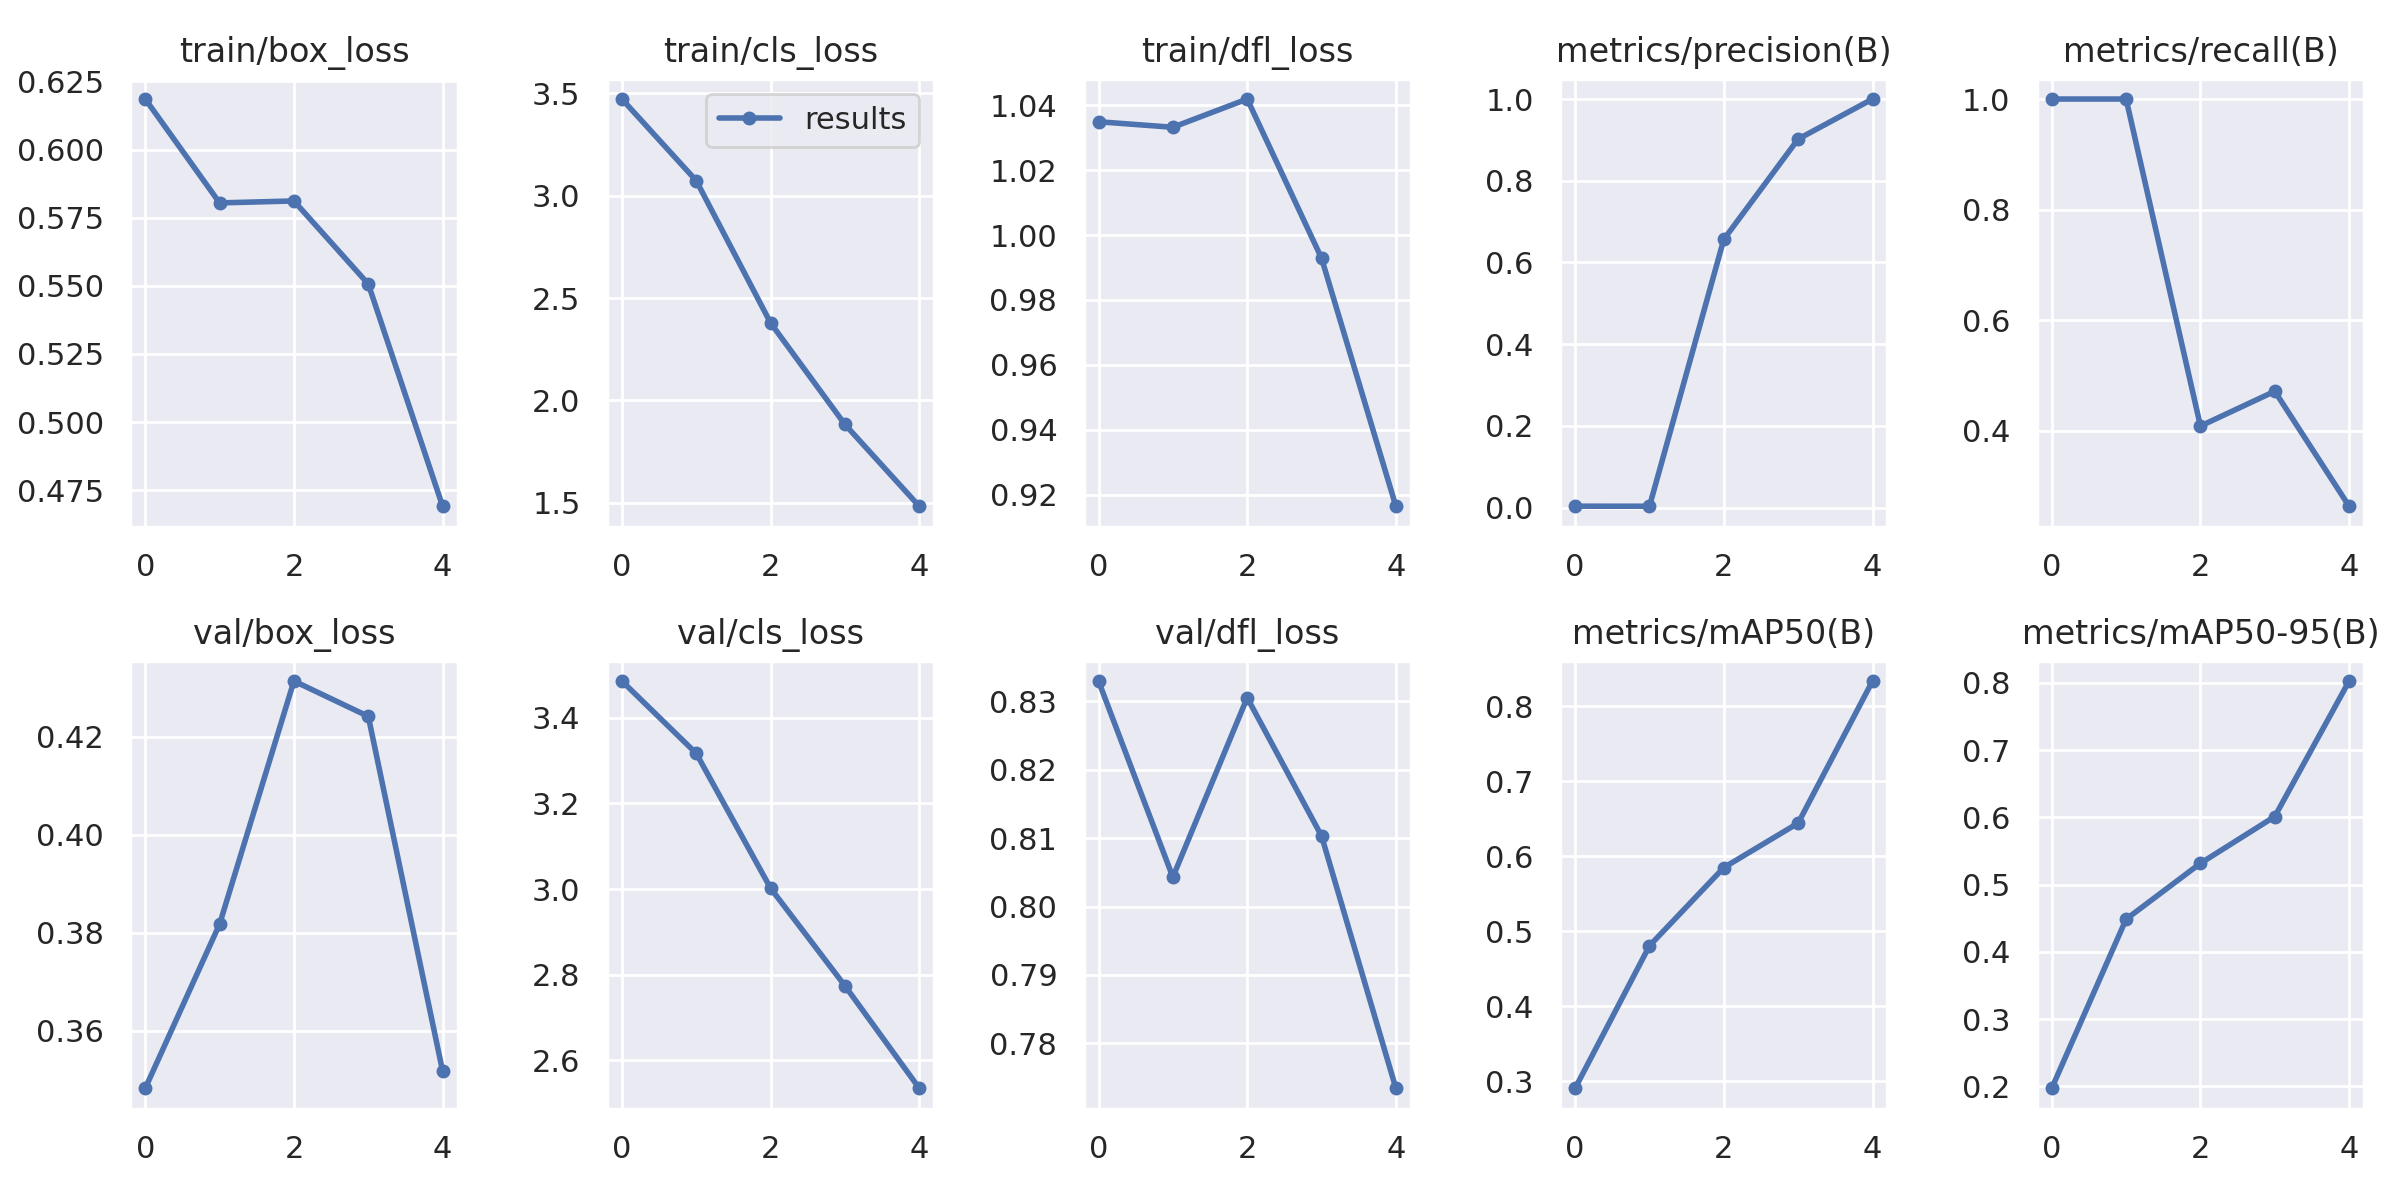

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


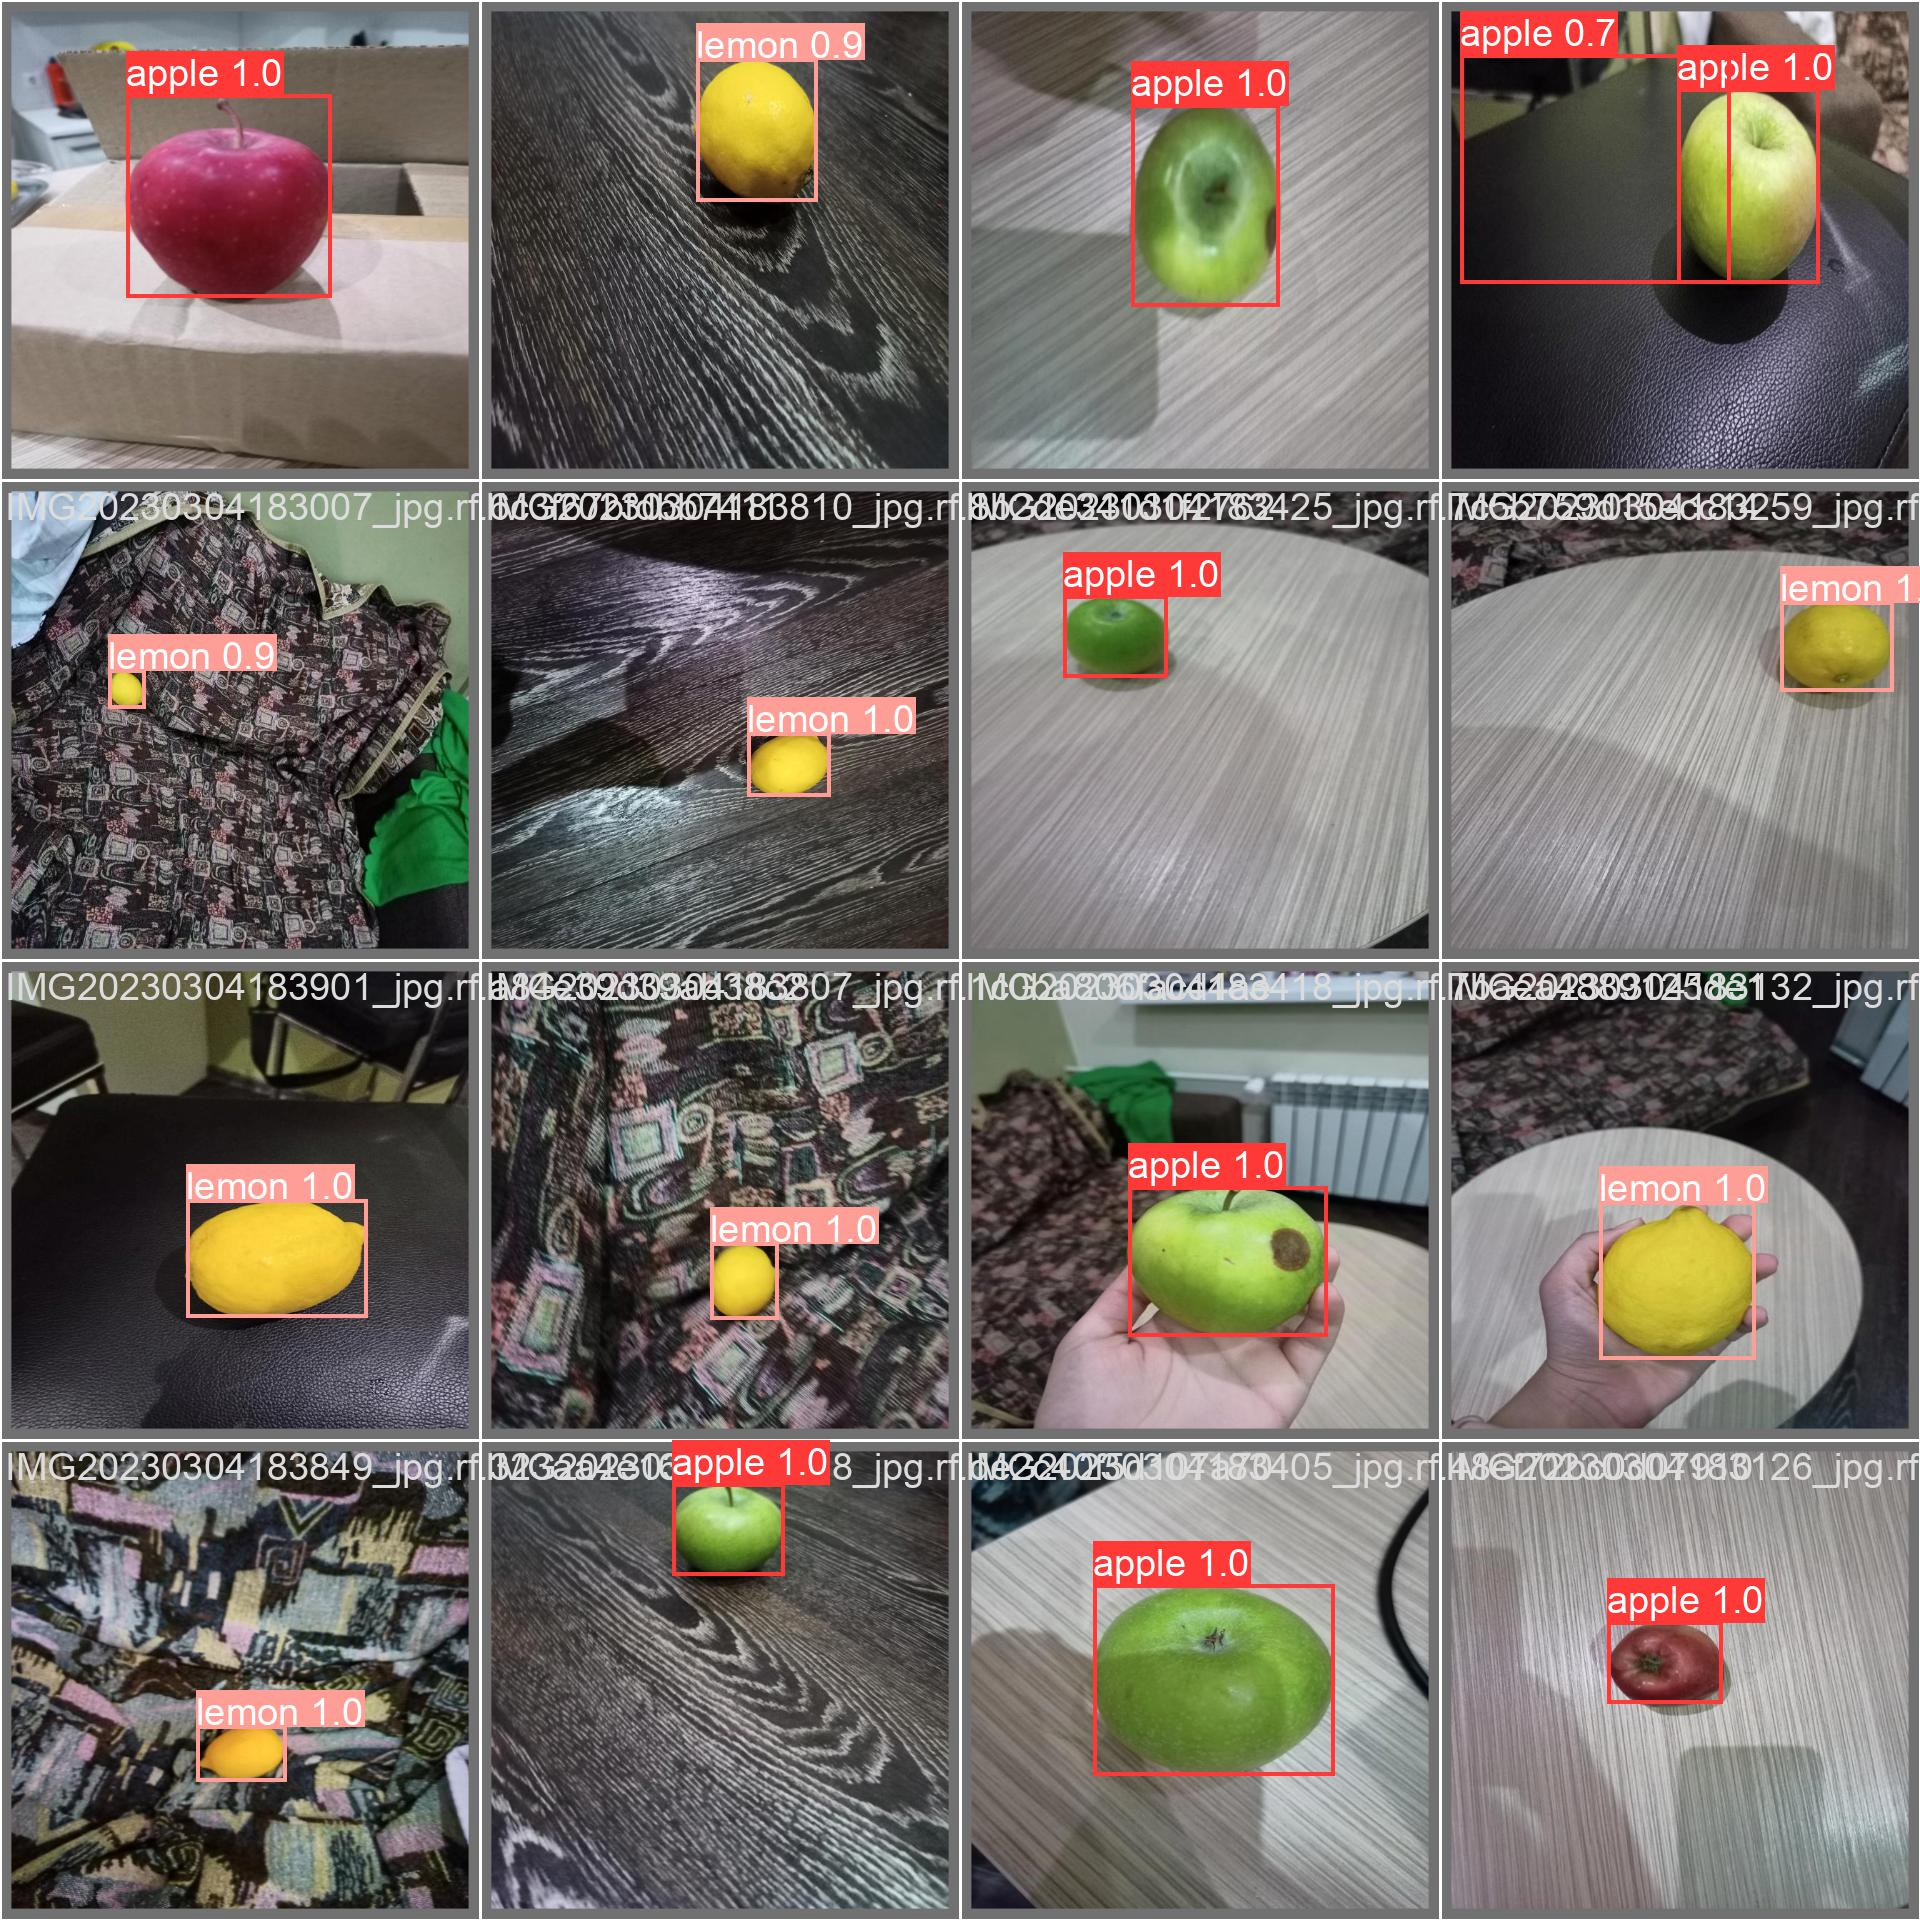

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

### Run Inference

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/11 /content/datasets/AML-HW1-1/test/images/IMG20230304182944_jpg.rf.3aa9f7f5da40cd00ecaad7f1dbaa7841.jpg: 640x640 1 apple, 8.3ms
image 2/11 /content/datasets/AML-HW1-1/test/images/IMG20230304183029_jpg.rf.b33972f010e00e9aab8c6c05a46dd77e.jpg: 640x640 2 apples, 8.3ms
image 3/11 /content/datasets/AML-HW1-1/test/images/IMG20230304183038_jpg.rf.7287d1c8b007bd12f72157092dc5dd21.jpg: 640x640 1 apple, 8.4ms
image 4/11 /content/datasets/AML-HW1-1/test/images/IMG20230304183041_jpg.rf.abd65a1b20ba561c01ac8c7009356e0b.jpg: 640x640 1 apple, 8.5ms
image 5/11 /content/datasets/AML-HW1-1/test/images/IMG20230304183241_jpg.rf.b374c4ebf9ac1656eedb75b02759a9f1.jpg: 640x640 1 apple, 8.3ms
image 6/11 /content/datasets/AML-HW1-1/test/images/IMG20230304183252_jpg.rf.4843c006dacc72a95f946695041e3bc7.jpg: 640x640 1 apple, 7.9ms
im

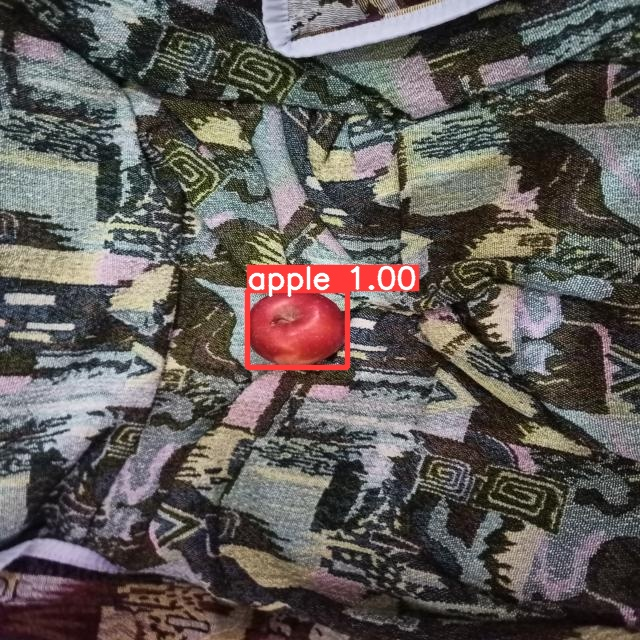

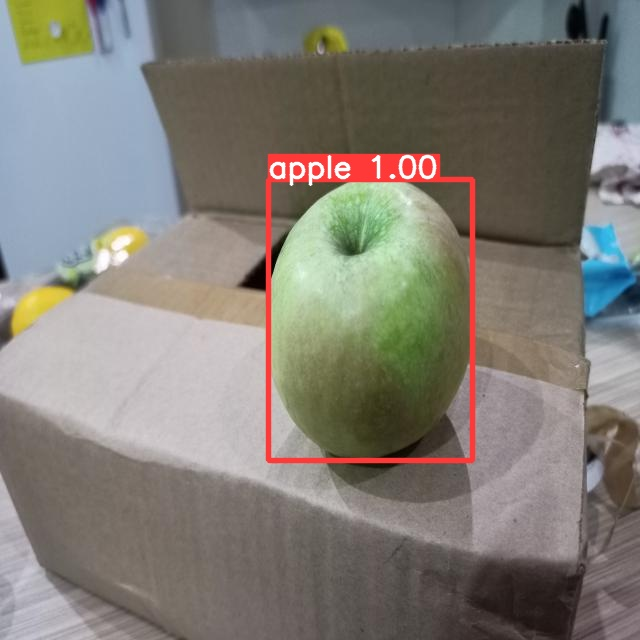

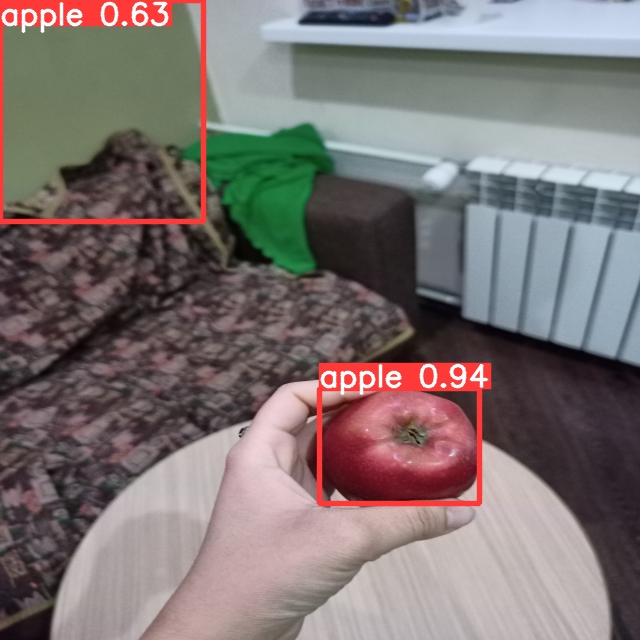

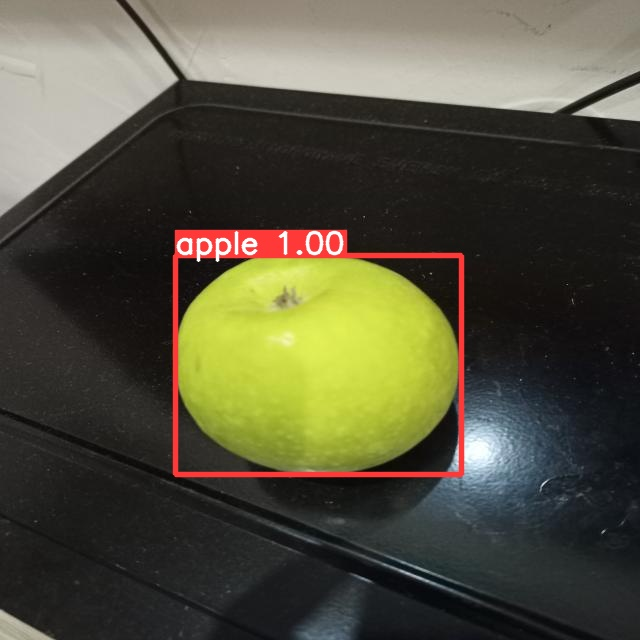

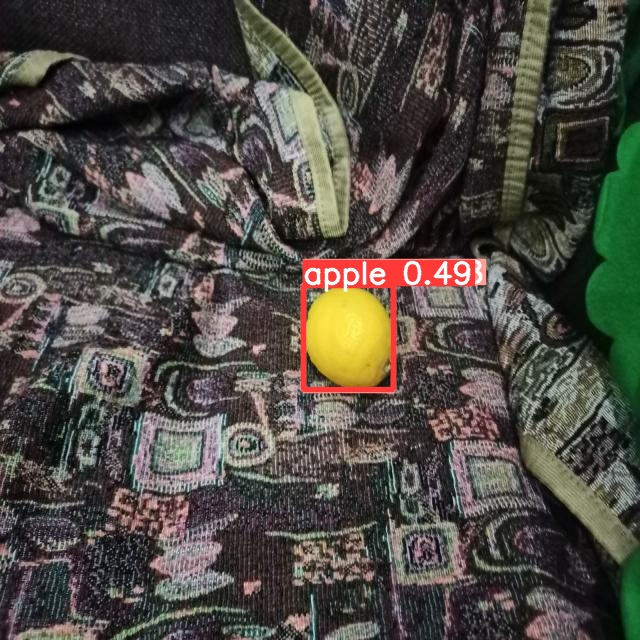

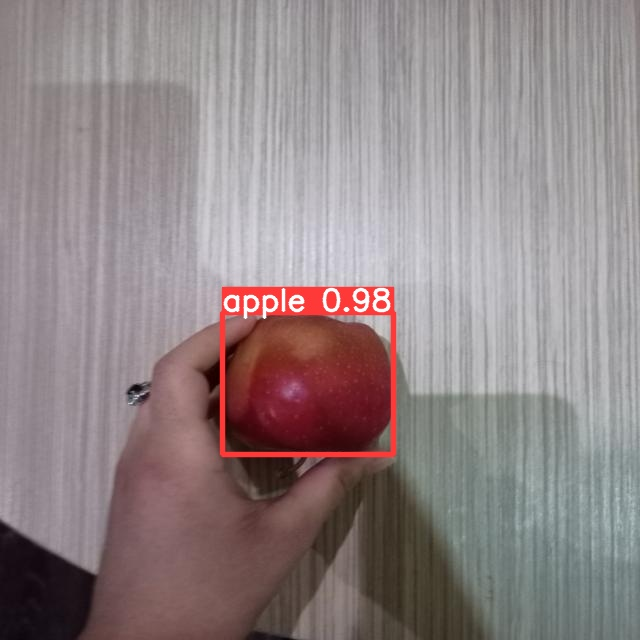

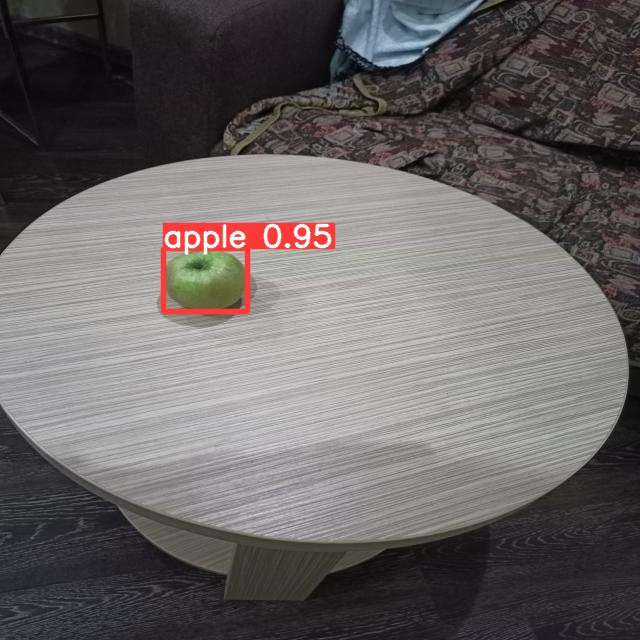

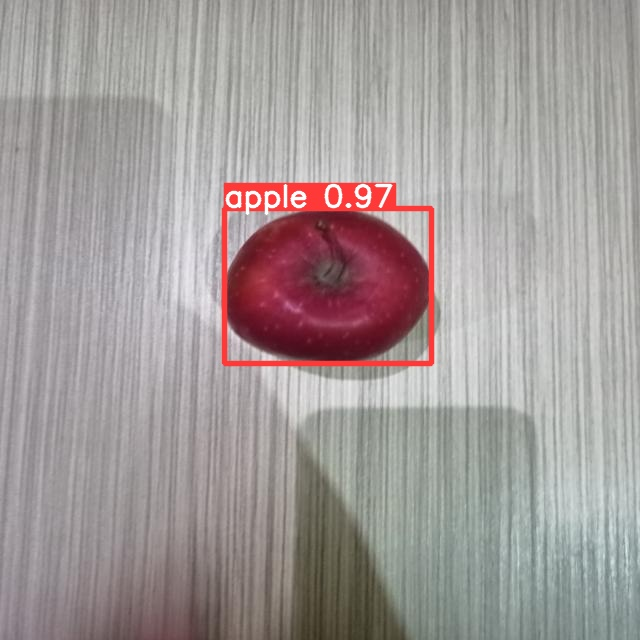

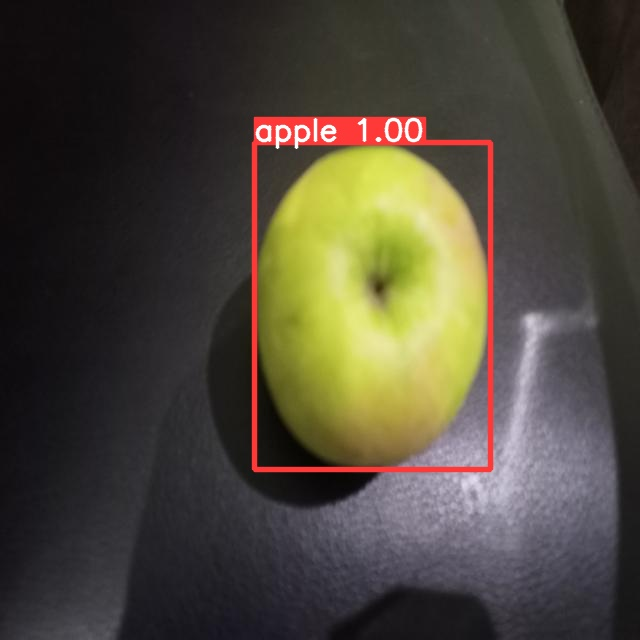

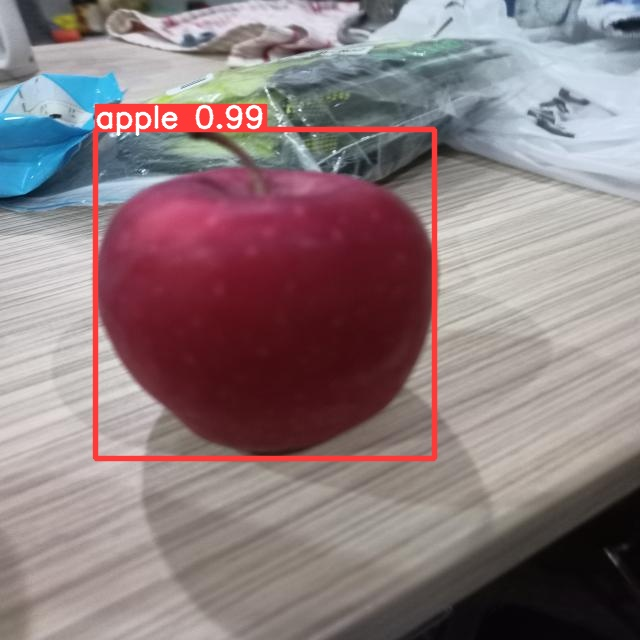

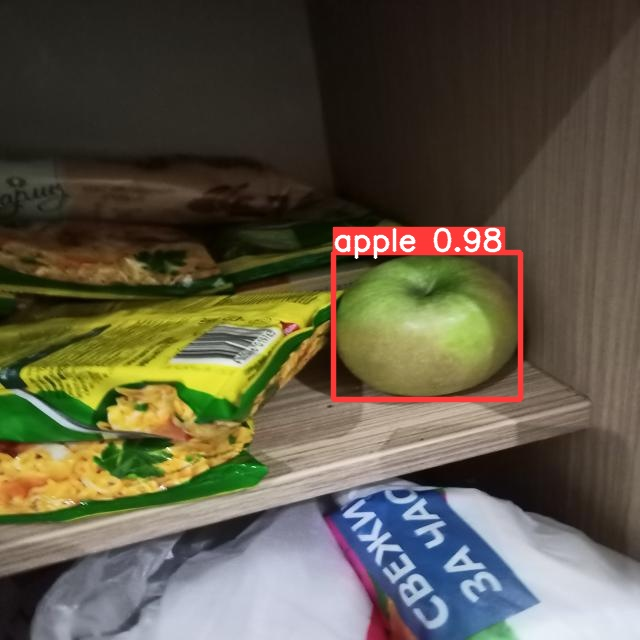

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")